# EN3160 Assignment 3 on Neural Networks

## E. M. A. R. Niroshan
## 210433R

# Question 01

In [20]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

In [21]:
# 1. Dataloading
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

batch_size = 50
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=2)
testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False, num_workers=2)
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


In [22]:
# 2. Define Network with Middle Layer
Din = 3 * 32 * 32  # Input size (flattened CIFAR-10 image size)
H = 100            # Number of nodes in the middle layer
K = 10             # Output size (number of classes in CIFAR-10)

# Initialize weights and biases as parameters
w1 = nn.Parameter(torch.randn(Din, H) * 1e-5)
b1 = nn.Parameter(torch.zeros(H))
w2 = nn.Parameter(torch.randn(H, K) * 1e-5)
b2 = nn.Parameter(torch.zeros(K))

# Hyperparameters
epochs = 10
lr = 2e-6  # Learning rate
lr_decay = 0.9  # Learning rate decay
loss_history = []

# Define sigmoid function
sigmoid = torch.nn.Sigmoid()

# Define Cross-Entropy Loss
criterion = nn.CrossEntropyLoss()

# Define optimizer for parameters
optimizer = optim.SGD([w1, b1, w2, b2], lr=lr)

In [ ]:
# 3. Training Loop
for epoch in range(epochs):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # Get inputs and labels
        inputs, labels = data
        Ntr = inputs.shape[0]
        x_train = inputs.view(Ntr, -1)  # Flatten input to (Ntr, Din)
        
        # Forward pass
        hidden = sigmoid(x_train.mm(w1) + b1)  
        y_pred = hidden.mm(w2) + b2            

        # Loss calculation (Cross-Entropy Loss)
        loss = criterion(y_pred, labels)
        loss_history.append(loss.item())
        running_loss += loss.item()

        # Backpropagation and optimization step
        optimizer.zero_grad()  
        loss.backward()        
        optimizer.step()       # Update weights

    # Print loss for each epoch
    print(f"Epoch {epoch + 1}/{epochs}, Loss: {running_loss / len(trainloader)}")
    
    # Learning rate decay
    for param_group in optimizer.param_groups:
        param_group['lr'] *= lr_decay

Epoch 1/10, Loss: 2.3025855419635772
Epoch 2/10, Loss: 2.302585501909256
Epoch 3/10, Loss: 2.302585454940796
Epoch 4/10, Loss: 2.3025854365825653
Epoch 5/10, Loss: 2.302585381031036
Epoch 6/10, Loss: 2.3025853641033174
Epoch 7/10, Loss: 2.3025853221416472
Epoch 8/10, Loss: 2.3025853068828583
Epoch 9/10, Loss: 2.302585281610489
Epoch 10/10, Loss: 2.302585261106491


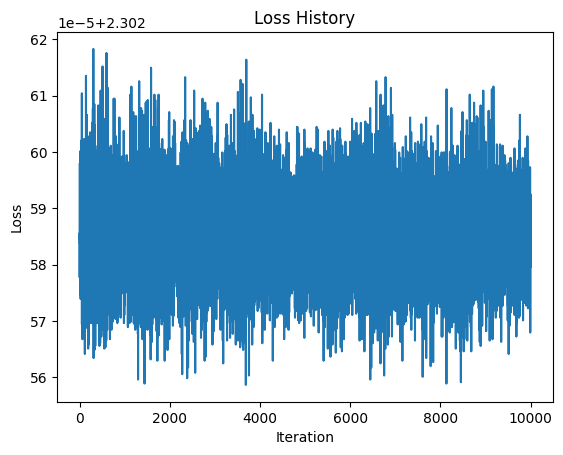

In [ ]:
# 4. Plotting the Loss History
plt.plot(loss_history)
plt.title("Loss History")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.show()


In [27]:
# 5. Calculate Accuracy on Training Set
correct_train = 0
total_train = 0
with torch.no_grad():
    for data in trainloader:
        inputs, labels = data
        Ntr = inputs.shape[0]
        x_train = inputs.view(Ntr, -1)
        
        hidden_activations = torch.sigmoid(x_train.mm(w1) + b1)
        y_train_pred = hidden_activations.mm(w2) + b2
        predicted_train = torch.argmax(y_train_pred, dim=1)
        
        total_train += labels.size(0)
        correct_train += (predicted_train == labels).sum().item()

train_acc = 100 * correct_train / total_train
print(f"Training accuracy: {train_acc:.2f}%")



Training accuracy: 10.00%


In [28]:
# 6. Calculate Accuracy on Test Set
correct_test = 0
total_test = 0
with torch.no_grad():
    for data in testloader:
        inputs, labels = data
        Nte = inputs.shape[0]
        x_test = inputs.view(Nte, -1)

        # Forward pass
        hidden = sigmoid(x_test.mm(w1) + b1)
        y_test_pred = hidden.mm(w2) + b2
        predicted_test = torch.argmax(y_test_pred, dim=1)
        total_test += labels.size(0)
        correct_test += (predicted_test == labels).sum().item()

test_acc = 100 * correct_test / total_test
print(f"Test accuracy: {test_acc:.2f}%")

Test accuracy: 10.00%


# Question 02

In [ ]:
from torch.utils.data import DataLoader

# Define the LeNet-5 model
class LeNet5(nn.Module):
    def __init__(self):
        super(LeNet5, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, kernel_size=5, stride=1, padding=2)  
        self.pool = nn.AvgPool2d(kernel_size=2, stride=2)                 
        self.conv2 = nn.Conv2d(6, 16, kernel_size=5, stride=1)           
        self.fc1 = nn.Linear(16 * 5 * 5, 120)                          
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))  # Conv1 + Pooling + ReLU
        x = self.pool(torch.relu(self.conv2(x)))  # Conv2 + Pooling + ReLU
        x = x.view(x.size(0), -1)                 # Flatten
        x = torch.relu(self.fc1(x))               # FC1 + ReLU
        x = torch.relu(self.fc2(x))               # FC2 + ReLU
        x = self.fc3(x)                           # FC3 
        return x


In [32]:
# Load MNIST dataset
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
trainloader = DataLoader(trainset, batch_size=64, shuffle=True)

testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)
testloader = DataLoader(testset, batch_size=64, shuffle=False)

# Instantiate the model, define loss function and optimizer
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = LeNet5().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)





In [33]:
# Training loop
epochs = 10
train_accuracies = []
test_accuracies = []

for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    correct_train = 0
    total_train = 0

    for images, labels in trainloader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()             
        outputs = model(images)           # Forward pass
        loss = criterion(outputs, labels) 
        loss.backward()                   # Backpropagation
        optimizer.step()                  # Update weights

        running_loss += loss.item()
        _, predicted = outputs.max(1)
        total_train += labels.size(0)
        correct_train += predicted.eq(labels).sum().item()

    # Calculate and store training accuracy
    train_accuracy = 100 * correct_train / total_train
    train_accuracies.append(train_accuracy)
    print(f"Epoch [{epoch+1}/{epochs}], Loss: {running_loss/len(trainloader):.4f}, Training Accuracy: {train_accuracy:.2f}%")

    # Evaluate on test set
    model.eval()
    correct_test = 0
    total_test = 0
    with torch.no_grad():
        for images, labels in testloader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = outputs.max(1)
            total_test += labels.size(0)
            correct_test += predicted.eq(labels).sum().item()

    # Calculate and store test accuracy
    test_accuracy = 100 * correct_test / total_test
    test_accuracies.append(test_accuracy)
    print(f"Test Accuracy after Epoch {epoch+1}: {test_accuracy:.2f}%")

Epoch [1/10], Loss: 0.3312, Training Accuracy: 89.46%
Test Accuracy after Epoch 1: 97.05%
Epoch [2/10], Loss: 0.0902, Training Accuracy: 97.27%
Test Accuracy after Epoch 2: 98.01%
Epoch [3/10], Loss: 0.0627, Training Accuracy: 98.04%
Test Accuracy after Epoch 3: 98.20%
Epoch [4/10], Loss: 0.0486, Training Accuracy: 98.53%
Test Accuracy after Epoch 4: 98.71%
Epoch [5/10], Loss: 0.0421, Training Accuracy: 98.67%
Test Accuracy after Epoch 5: 98.97%
Epoch [6/10], Loss: 0.0349, Training Accuracy: 98.83%
Test Accuracy after Epoch 6: 98.87%
Epoch [7/10], Loss: 0.0303, Training Accuracy: 99.01%
Test Accuracy after Epoch 7: 98.46%
Epoch [8/10], Loss: 0.0253, Training Accuracy: 99.21%
Test Accuracy after Epoch 8: 98.86%
Epoch [9/10], Loss: 0.0234, Training Accuracy: 99.26%
Test Accuracy after Epoch 9: 99.01%
Epoch [10/10], Loss: 0.0206, Training Accuracy: 99.32%
Test Accuracy after Epoch 10: 98.79%


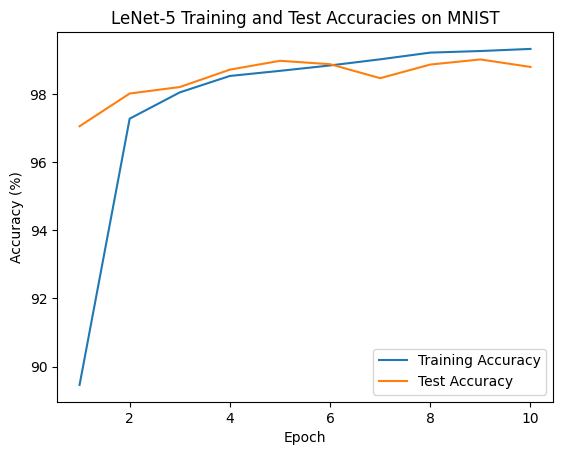

In [34]:
# Plotting the training and test accuracies over epochs
plt.plot(range(1, epochs + 1), train_accuracies, label="Training Accuracy")
plt.plot(range(1, epochs + 1), test_accuracies, label="Test Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy (%)")
plt.title("LeNet-5 Training and Test Accuracies on MNIST")
plt.legend()
plt.show()


# Question 03

In [38]:
#Fine-Tuning Approach
import torch
import torch.nn as nn
from torch.optim import Adam
from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader

transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Load the dataset
train_data = datasets.ImageFolder(root='data/hymenoptera_data/train', transform=transform)
val_data = datasets.ImageFolder(root='data/hymenoptera_data/val', transform=transform)

train_loader = DataLoader(train_data, batch_size=32, shuffle=True)
val_loader = DataLoader(val_data, batch_size=32, shuffle=False)

# pre-trained ResNet18 model
model = models.resnet18(pretrained=True)

model.fc = nn.Linear(model.fc.in_features, 2)

for param in model.parameters():
    param.requires_grad = False

for param in model.fc.parameters():
    param.requires_grad = True

# Set up the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = Adam(model.fc.parameters(), lr=0.001)

# Check if GPU is available, otherwise use CPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Training loop
num_epochs = 10
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward pass and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        # Calculate accuracy
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    epoch_loss = running_loss / len(train_loader)
    epoch_accuracy = 100 * correct / total
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}, Accuracy: {epoch_accuracy:.2f}%")

# Evaluate the model on the validation set
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for images, labels in val_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

val_accuracy = 100 * correct / total
print(f'Validation Accuracy: {val_accuracy:.2f}%')


c:\Users\nraji\tfod\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\nraji\tfod\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to C:\Users\nraji/.cache\torch\hub\checkpoints\resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:25<00:00, 1.82MB/s]


Epoch [1/10], Loss: 0.6068, Accuracy: 68.44%
Epoch [2/10], Loss: 0.4447, Accuracy: 86.48%
Epoch [3/10], Loss: 0.3416, Accuracy: 89.75%
Epoch [4/10], Loss: 0.2751, Accuracy: 92.62%
Epoch [5/10], Loss: 0.2388, Accuracy: 94.67%
Epoch [6/10], Loss: 0.2040, Accuracy: 95.90%
Epoch [7/10], Loss: 0.2043, Accuracy: 93.85%
Epoch [8/10], Loss: 0.1625, Accuracy: 96.31%
Epoch [9/10], Loss: 0.1961, Accuracy: 93.85%
Epoch [10/10], Loss: 0.1575, Accuracy: 95.90%
Validation Accuracy: 92.16%


### Feature Extraction Approach

In [39]:
# pre-trained ResNet18 model
model = models.resnet18(pretrained=True)

# Freeze all layers
for param in model.parameters():
    param.requires_grad = False

model.fc = nn.Linear(model.fc.in_features, 2)

# Set up the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = Adam(model.fc.parameters(), lr=0.001)

# Check if GPU is available, otherwise use CPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Training loop
num_epochs = 10
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward pass and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        # Calculate accuracy
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    epoch_loss = running_loss / len(train_loader)
    epoch_accuracy = 100 * correct / total
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}, Accuracy: {epoch_accuracy:.2f}%")

# Evaluate the model on the validation set
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for images, labels in val_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

val_accuracy = 100 * correct / total
print(f'Validation Accuracy: {val_accuracy:.2f}%')


Epoch [1/10], Loss: 0.7821, Accuracy: 47.13%
Epoch [2/10], Loss: 0.5021, Accuracy: 77.87%
Epoch [3/10], Loss: 0.3492, Accuracy: 90.98%
Epoch [4/10], Loss: 0.2886, Accuracy: 93.44%
Epoch [5/10], Loss: 0.2381, Accuracy: 95.49%
Epoch [6/10], Loss: 0.2463, Accuracy: 90.57%
Epoch [7/10], Loss: 0.2005, Accuracy: 95.49%
Epoch [8/10], Loss: 0.1717, Accuracy: 96.31%
Epoch [9/10], Loss: 0.1595, Accuracy: 97.54%
Epoch [10/10], Loss: 0.1550, Accuracy: 95.90%
Validation Accuracy: 92.16%
